# Stale Alarms By Type

Data was gathered from the alarm inconsistency script for the past month.  The script is run just before a CDI completes, and before any clearing events.
After removing alarms against non-MPN NE's and ports, we find that we are successfully processing 83% of all alarms.

Of the rest, the majority are missing "ANA Port Down" alarms.  We continue to investigate the root cause of those.

In [1]:
%matplotlib inline
from IPython.core.display import display, HTML
display(HTML("""
<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>
<style>.container { width:100% !important; height:100% !important;}</style>
<style>
table {float:left}
</style>

"""))

from stale_alarm_analysis import *

mpn = frame_from_alarm_files(glob.glob("/Users/sean.cavanagh/delete-me/stale-alarms/mpn/*09*diffs.csv"),"MPN 6.1.4")

In [2]:
add_buckets(mpn)
mpn["valid"] = mpn.apply(valid_mpn, axis=1)
with open("/Users/sean.cavanagh/delete-me/stale-alarms/mpn/invalid-nes.txt","w") as f:
  f.write("\n".join(mpn[mpn.valid != "Valid"]["id"].apply(parse_device).dropna().unique()))

In [3]:
mpn["valid"].value_counts()

Not MPN Device    14870
Valid               545
Not MPN Port        518
Name: valid, dtype: int64

In [4]:
mpn = mpn[mpn.valid == "Valid"]
mpn = mpn[mpn.bucket != "Transient"]

mpn_groups = bin_by_field('category',mpn)
more_invalid = ['BLTNMN865AE',
 'BLTNMN865BE',
'OMALNEXU5AE',
 'OMALNEXU5BE',]
discount = mpn["id"].apply(lambda x:reduce(lambda a,b: a or b, [m in x for m in more_invalid]))
discount.value_counts()

False    483
True       1
Name: id, dtype: int64

In [5]:
mpn["bucket"].value_counts()

Missing    481
Stale        3
Name: bucket, dtype: int64

In [6]:
foo = [[pd.to_datetime("2017-05-10T00:00:00Z"),378], [pd.to_datetime("2017-05-11T00:00:00Z"),2542], [pd.to_datetime("2017-05-12T00:00:00Z"),500], [pd.to_datetime("2017-05-13T00:00:00Z"),123], [pd.to_datetime("2017-05-14T00:00:00Z"),141], [pd.to_datetime("2017-05-15T00:00:00Z"),151], [pd.to_datetime("2017-05-16T00:00:00Z"),644], [pd.to_datetime("2017-05-17T00:00:00Z"),303], [pd.to_datetime("2017-05-18T00:00:00Z"),132], [pd.to_datetime("2017-05-19T00:00:00Z"),120], [pd.to_datetime("2017-05-20T00:00:00Z"),124], [pd.to_datetime("2017-05-21T00:00:00Z"),131], [pd.to_datetime("2017-05-22T00:00:00Z"),2145], [pd.to_datetime("2017-05-23T00:00:00Z"),1075], [pd.to_datetime("2017-05-24T00:00:00Z"),549], [pd.to_datetime("2017-05-25T00:00:00Z"),147], [pd.to_datetime("2017-05-26T00:00:00Z"),1333], [pd.to_datetime("2017-05-27T00:00:00Z"),116], [pd.to_datetime("2017-05-28T00:00:00Z"),2395], [pd.to_datetime("2017-05-29T00:00:00Z"),158], [pd.to_datetime("2017-05-30T00:00:00Z"),410], [pd.to_datetime("2017-05-31T00:00:00Z"),793], [pd.to_datetime("2017-06-01T00:00:00Z"),863], [pd.to_datetime("2017-06-02T00:00:00Z"),818], [pd.to_datetime("2017-06-03T00:00:00Z"),136], [pd.to_datetime("2017-06-04T00:00:00Z"),569], [pd.to_datetime("2017-06-05T00:00:00Z"),3356], [pd.to_datetime("2017-06-06T00:00:00Z"),806], [pd.to_datetime("2017-06-07T00:00:00Z"),186], [pd.to_datetime("2017-06-08T00:00:00Z"),1090], [pd.to_datetime("2017-06-09T00:00:00Z"),181], [pd.to_datetime("2017-06-10T00:00:00Z"),138], [pd.to_datetime("2017-06-11T00:00:00Z"),766], [pd.to_datetime("2017-06-12T00:00:00Z"),149], [pd.to_datetime("2017-06-13T00:00:00Z"),4406]]
solr_total = pd.Series(data = [x[1] for x in foo],index=[x[0] for x in foo],name="Total Alarms")
solr_total.sum()

27874

In [7]:
mpn_totals = bin_by_field('system', [mpn])
mpn_totals["All Alarms"] = mpn_totals["MPN 6.1.4"] + solr_total
#mpn_totals.plot(figsize=(18,8),style='o-', title="MPN Total Problem Alarms vs. All Reported Alarms")
mpn_totals

MPN 6.1.4  All Alarms
2017-04-06 09:00:00         11         NaN
2017-04-07 09:00:00          9         NaN
2017-04-08 09:00:00          8         NaN
2017-04-10 09:00:00         10         NaN
2017-04-11 09:00:00         10         NaN
2017-04-12 09:00:00          5         NaN
2017-04-13 09:00:00          3         NaN
2017-04-14 09:00:00          7         NaN
2017-04-16 09:00:00          7         NaN
2017-04-17 09:00:00          7         NaN
2017-04-18 09:00:00          7         NaN
2017-04-19 09:00:00          7         NaN
2017-04-20 09:00:00          3         NaN
2017-04-21 09:00:00          7         NaN
2017-04-23 09:00:00          1         NaN
2017-04-24 09:00:00          1         NaN
2017-04-25 09:00:00          4         NaN
2017-04-26 09:00:00          2         NaN
2017-04-27 09:00:00          3         NaN
2017-04-28 09:00:00          2         NaN
2017-04-29 09:00:00          1         NaN
2017-04-30 09:00:00          1         NaN
2017-05-01 09:00:00          1         NaN
2017-05-02 09:00:00          1         NaN
2017-05-03 09:00:00          8         NaN
2017-05-04 09:00:00          6         NaN
2017-05-05 09:00:00          8         NaN
2017-05-06 09:00:00          6         NaN
2017-05-07 09:00:00          5         NaN
2017-05-08 09:00:00          6         NaN
...                        ...         ...
2017-05-15 09:00:00          2         NaN
2017-05-16 09:00:00          4         NaN
2017-05-17 09:00:00          6         NaN
2017-05-18 09:00:00          7         NaN
2017-05-19 09:00:00         40         NaN
2017-05-20 09:00:00          6         NaN
2017-05-21 09:00:00          7         NaN
2017-05-22 09:00:00         15         NaN
2017-05-23 09:00:00         29         NaN
2017-05-24 09:00:00         11         NaN
2017-05-25 09:00:00         14         NaN
2017-05-26 09:00:00         10         NaN
2017-05-27 09:00:00         10         NaN
2017-05-28 09:00:00          4         NaN
2017-05-29 09:00:00          4         NaN
2017-05-30 09:00:00          4         NaN
2017-05-31 09:00:00          5         NaN
2017-06-01 09:00:00          5         NaN
2017-06-02 09:00:00         13         NaN
2017-06-03 09:00:00          6         NaN
2017-06-04 09:00:00          1         NaN
2017-06-05 09:00:00          2         NaN
2017-06-06 09:00:00          1         NaN
2017-06-07 09:00:00          3         NaN
2017-06-08 09:00:00          2         NaN
2017-06-09 09:00:00          4         NaN
2017-06-10 09:00:00          4         NaN
2017-06-11 09:00:00          4         NaN
2017-06-12 09:00:00         17         NaN
2017-06-13 09:00:00         10         NaN

[67 rows x 2 columns]

We've grouped the alarms in to three states:

| Type | VSM | Exanova
|----|------|-----
| Missing | Present | Absent 
| Inconsistent | Present | Present some places, Absent others 
| Stale | Absent | Present 


Comparing the systems by state, we can see that the inconsistent alarms are about the same, and Santa Clara, 5.2.2, has no stale alarms.

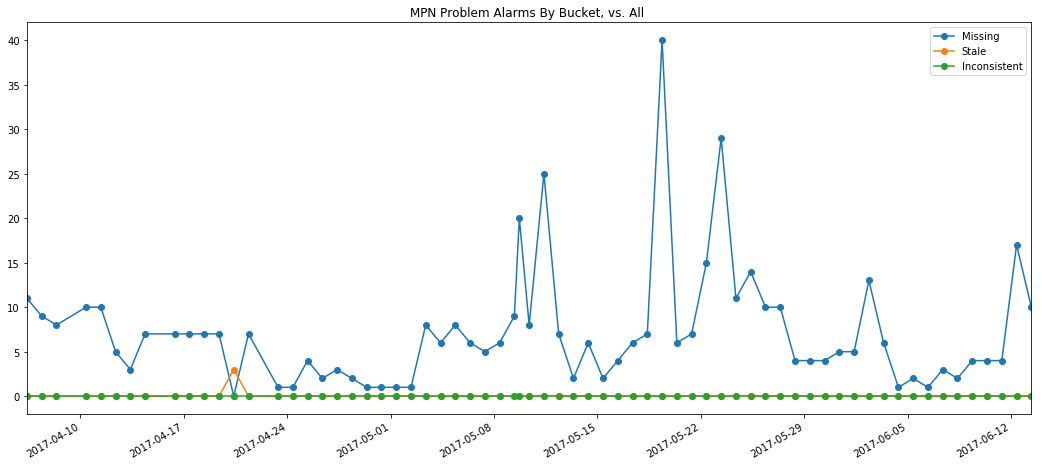

In [8]:
mpn_buckets = bin_by_bucket(mpn)

mpn_buckets.drop('Transient',1).fillna(0).plot(figsize=(18,8), style="o-", title="MPN Problem Alarms By Bucket, vs. All ")

In [9]:
mpn[mpn.correctable == True]["bucket"].value_counts()

Series([], Name: bucket, dtype: int64)

In [10]:
mpn["bucket"].value_counts()

Missing    481
Stale        3
Name: bucket, dtype: int64

#### Ratio of Processed Alarms

In [11]:
mpn_buckets["Processed Ratio"] = solr_total / mpn_totals["All Alarms"]
mpn_buckets["Processed Ratio"].describe()

count    0.0
mean     NaN
std      NaN
min      NaN
25%      NaN
50%      NaN
75%      NaN
max      NaN
Name: Processed Ratio, dtype: float64

In [12]:
#(mpn_totals["All Alarms"].sum() - mpn_totals["MPN 6.1.4"].sum()) / mpn_totals["All Alarms"].sum() 


In [13]:
bucket_map = prep_bucket_frames([mpn])

for (b,frame) in bucket_map.items():
  if (not frame.empty) and not b in ['Unclassified','Transient']:
      frame.fillna(0).plot(figsize=(18,8),title="%s Alarms"%b,style="o-")
    

/Users/sean.cavanagh/anaconda2/lib/python2.7/site-packages/matplotlib/axes/_base.py:2903: UserWarning: Attempting to set identical left==right results
in singular transformations; automatically expanding.
left=736439.375, right=736439.375
  'left=%s, right=%s') % (left, right))


### Missing Alarms


In [14]:
with open("/Users/sean.cavanagh/delete-me/stale-alarms/mpn/mpn-ids.txt","w") as f: 
    f.write("\n".join(mpn["id"].unique()))
    f.close()
    
real_entities = [l.rstrip() for l in open("/Users/sean.cavanagh/delete-me/stale-alarms/mpn/real-entities.txt","r").readlines()]
len(mpn['id'].unique())
fake_entities = set(mpn['id'].unique()) - set(real_entities)
mpn["in_athena"] = mpn.id.apply(lambda x: x in real_entities)

In [15]:
missing = mpn[mpn.bucket == "Missing"]
missing["alert_def"].value_counts()

anaLink_down                          199
anaLAG_Link_down                      101
anaBGP_link_down_due_to_oper           98
anaBGP_link_down                       67
anaLAG_Link_down_due_to_admin_down     16
Name: alert_def, dtype: int64

In [16]:
#missing[missing.in_athena == True]["alert_def"].value_counts()

In [17]:
#all_missing = missing[missing.alert_def == "anaDevice_Unreachable"]["id"].apply(parse_device)
#len([ne for ne in all_missing.values if ne not in bad_missing])
#missing[missing.alert_def == "anaDevice_Unreachable"]["id"]


In [18]:
mpn['bucket'].value_counts()

Missing    481
Stale        3
Name: bucket, dtype: int64

In [19]:
bad_ana_port_down_nes =  set(missing[missing.alert_def == "anaPort_down"]["id"].apply(lambda x: x.split(":")[2])) - set(real_nes)
bad_ana_port_down_nes

set()

In [20]:
all_ana_port_down_nes = missing[missing.alert_def == "anaPort_down"]["id"].apply(lambda x: x.split(":")[2])
len([ne for ne in all_ana_port_down_nes.values if ne not in bad_ana_port_down_nes])

0

In [21]:
(all_ana_port_down_nes.count() - 106)

-106